In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
trainFeaturesFile = 'HeartDisease/Warm_Up_Machine_Learning_with_a_Heart_-_Train_Values.csv'
trainLabelsFile = 'HeartDisease/Warm_Up_Machine_Learning_with_a_Heart_-_Train_Labels.csv'
testFile = 'HeartDisease/Warm_Up_Machine_Learning_with_a_Heart_-_Test_Values.csv'
                                
features = pd.read_csv(trainFeaturesFile)
labels = pd.read_csv(trainLabelsFile)

In [4]:
print(features.head(2))
print("---")
print(labels.head(2))


  patient_id  slope_of_peak_exercise_st_segment    thal  \
0     0z64un                                  1  normal   
1     ryoo3j                                  2  normal   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   

   max_heart_rate_achieved  exercise_induced_angina  
0                      170                        0  
1                      158                        0  
---
  patient_id  heart_disease_present
0     0z64un        

In [5]:
#merge in one dateframe for feature analysis and LabelEncoding of thal
df = features.merge(labels, on='patient_id')
df.thal = LabelEncoder().fit_transform(df.thal)
print(df.shape)
df.head()

(180, 15)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null int64
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
dtypes:

In [42]:
df.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,1.366667,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.568247,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


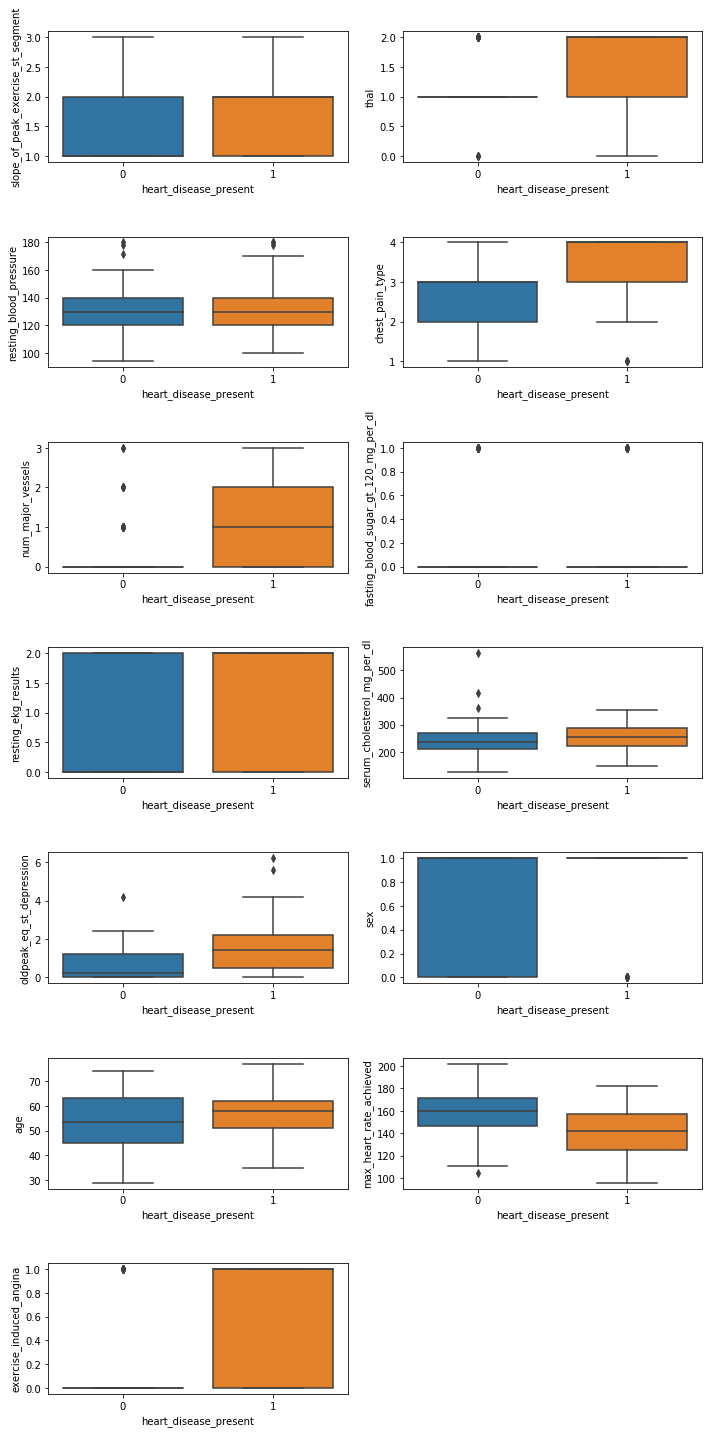

In [60]:
i = 1
plt.figure(figsize=(10,20))
for col in df.drop(['heart_disease_present', 'patient_id'], axis=1).columns:
    plt.subplot(7, 2, i)
    sns.boxplot(y=df[col], x=df.heart_disease_present)
    i += 1
plt.tight_layout()    

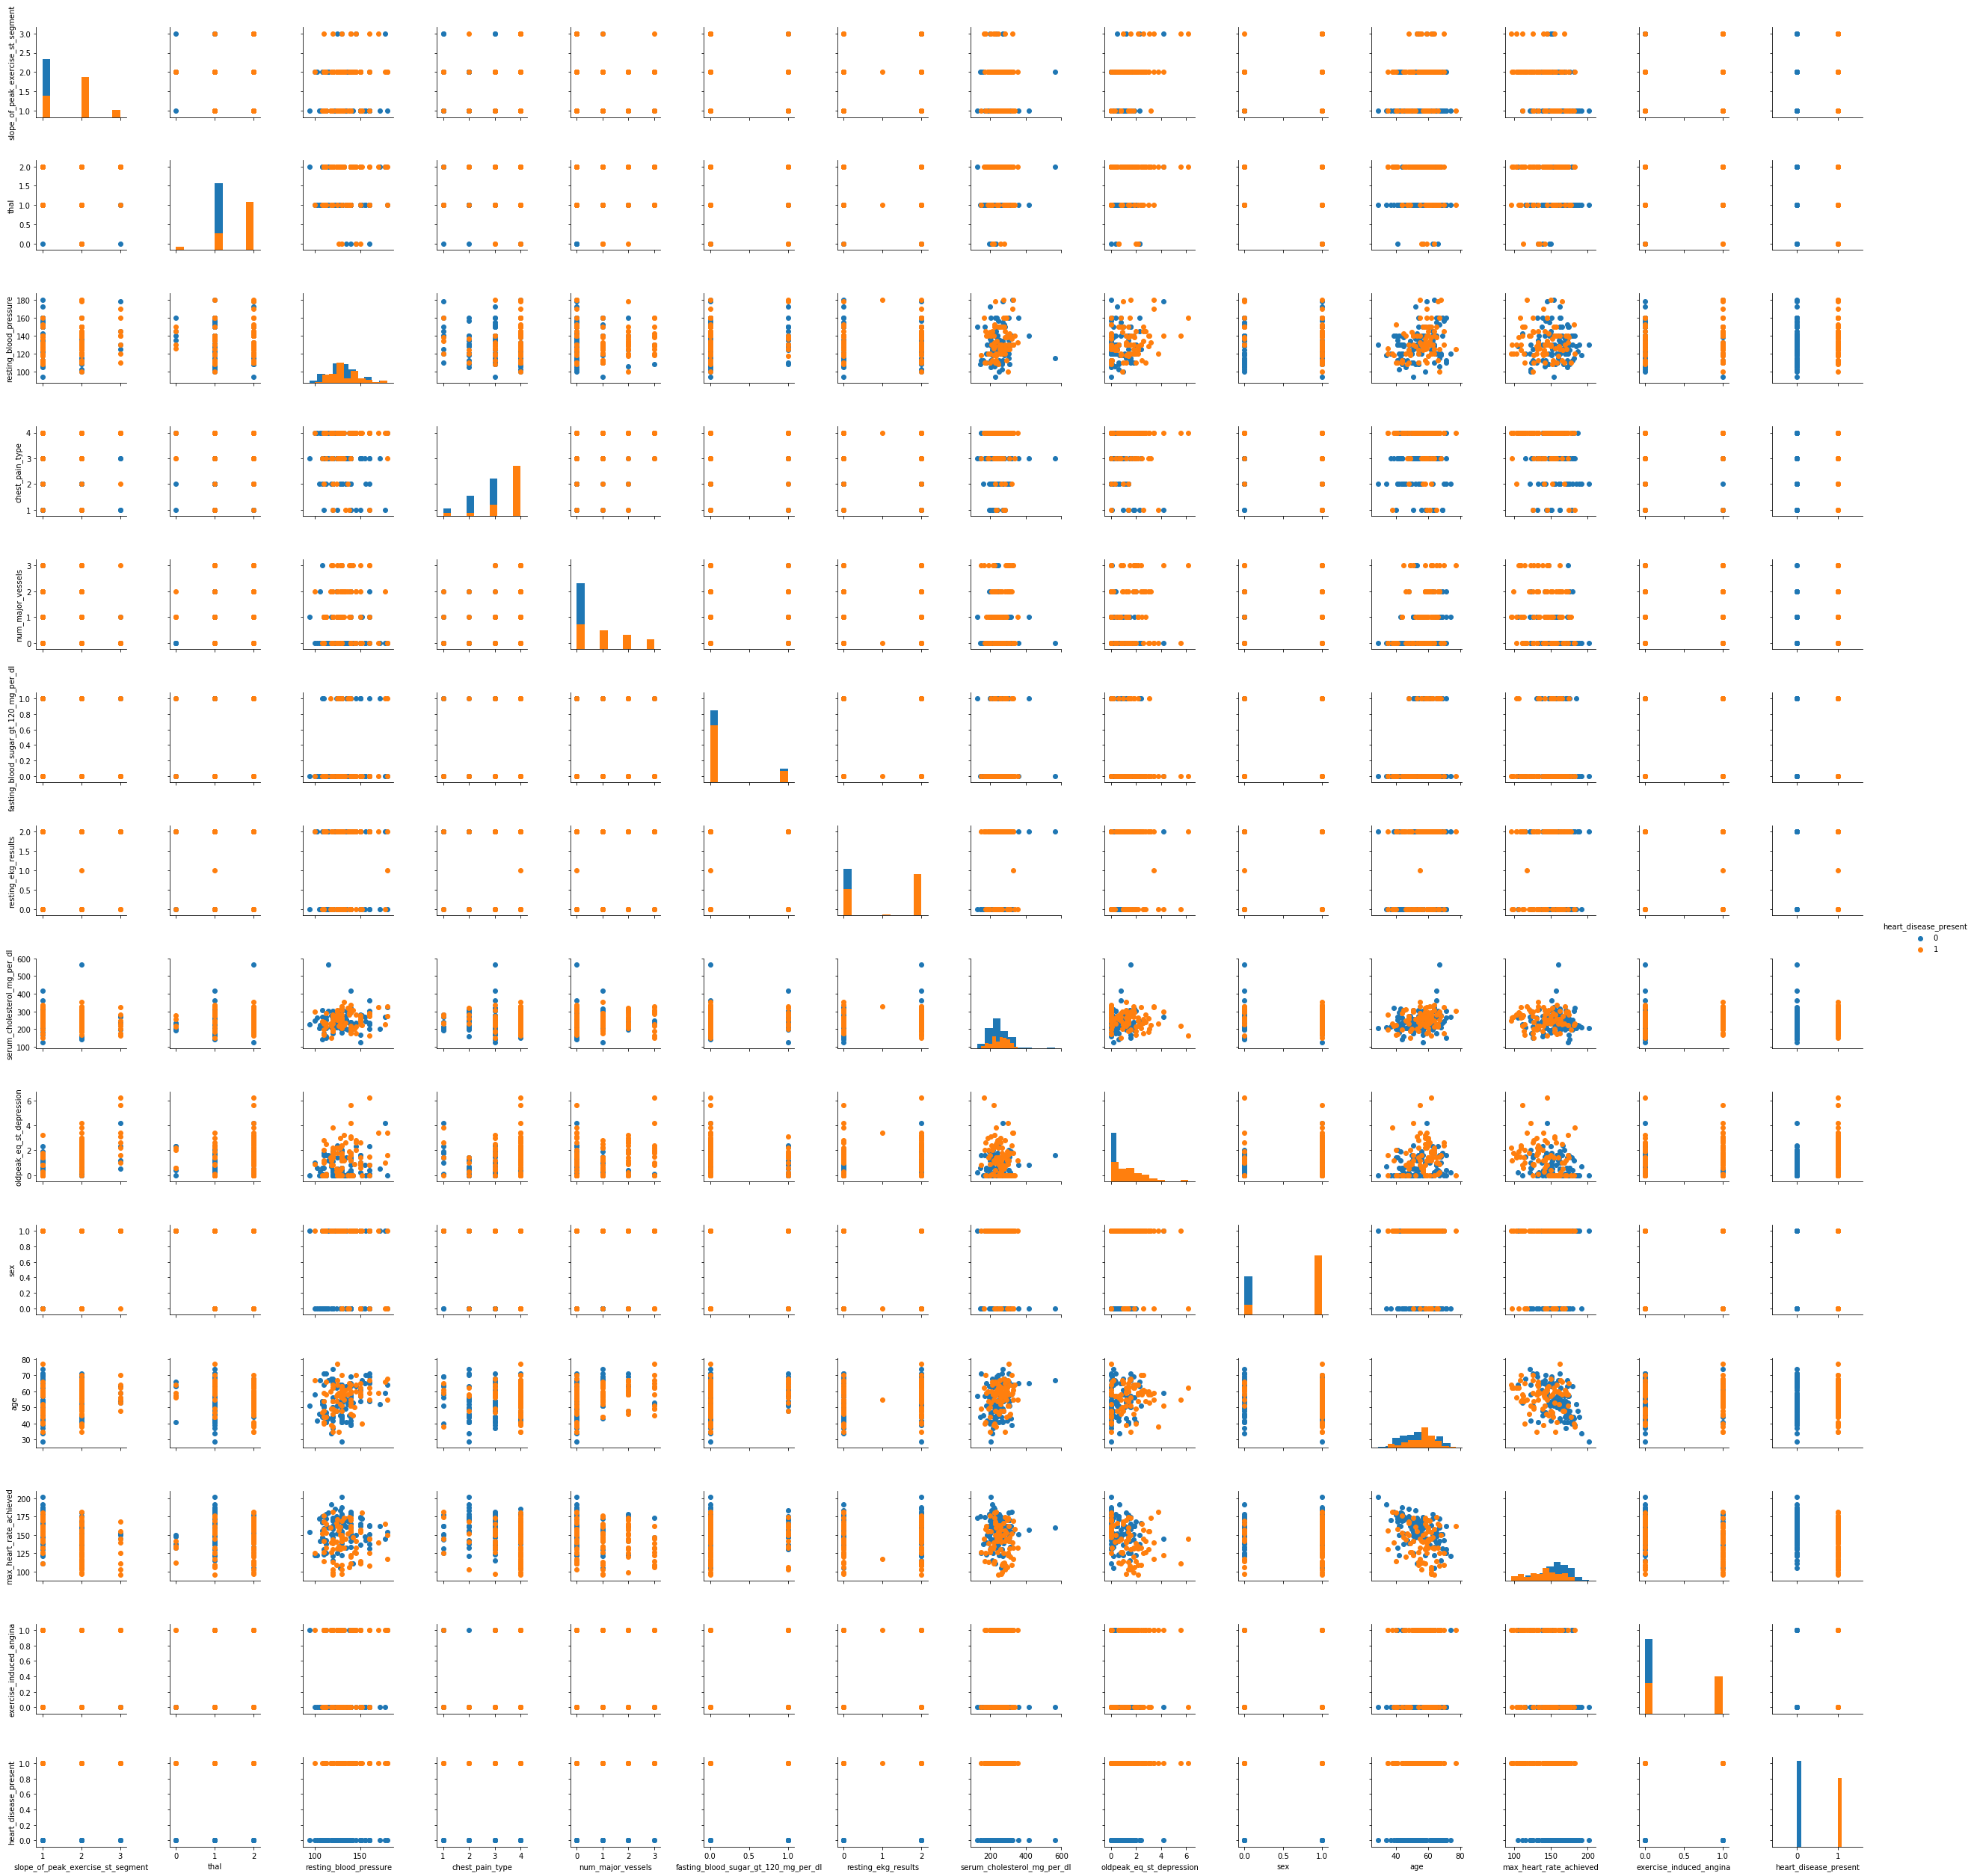

In [6]:
# Pair Grid with hue on a label
g = sns.PairGrid(df, hue="heart_disease_present")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [35]:
corrdf = df.corr()
corrdf.style.background_gradient(cmap='viridis')

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1,0.154101,0.0982868,0.121207,0.0768324,0.0501994,0.172191,-0.0323477,0.615948,0.0933402,0.169918,-0.418102,0.225459,0.344224
thal,0.154101,1,-0.00608779,0.269583,0.174107,-0.0702248,-0.0521713,0.0464479,0.251972,0.26542,-0.00793405,-0.142098,0.360395,0.447214
resting_blood_pressure,0.0982868,-0.00608779,1,-0.0292955,0.0423885,0.16657,0.0789861,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.0785057
chest_pain_type,0.121207,0.269583,-0.0292955,1,0.249061,-0.0889915,0.0333786,0.0612133,0.0807988,0.0860571,0.0850014,-0.301792,0.346266,0.412829
num_major_vessels,0.0768324,0.174107,0.0423885,0.249061,1,0.169792,0.0966561,0.0983476,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.0501994,-0.0702248,0.16657,-0.0889915,0.169792,1,0.0538638,0.0275601,-0.039055,0.0660099,0.176101,0.0583689,-0.00595575,0.00337907
resting_ekg_results,0.172191,-0.0521713,0.0789861,0.0333786,0.0966561,0.0538638,1,0.170839,0.0973211,0.0457862,0.126856,-0.102766,0.0377726,0.145933
serum_cholesterol_mg_per_dl,-0.0323477,0.0464479,0.144881,0.0612133,0.0983476,0.0275601,0.170839,1,-0.0219322,-0.152296,0.236211,-0.0710383,0.0831386,0.0797749
oldpeak_eq_st_depression,0.615948,0.251972,0.219026,0.0807988,0.214062,-0.039055,0.0973211,-0.0219322,1,0.0993738,0.1897,-0.341045,0.249167,0.38293
sex,0.0933402,0.26542,-0.055589,0.0860571,0.073107,0.0660099,0.0457862,-0.152296,0.0993738,1,-0.148997,-0.0539601,0.251096,0.335421


slope_of_peak_exercise_st_segment


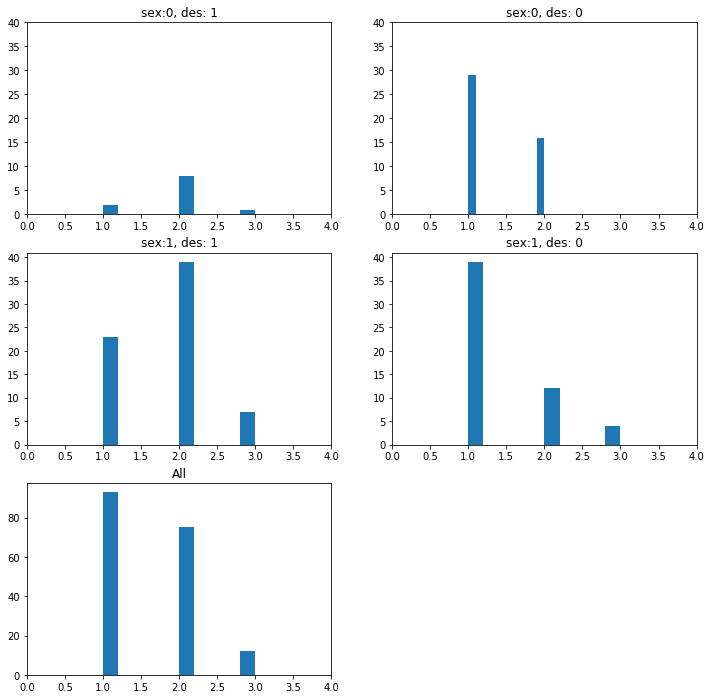

<Figure size 432x288 with 0 Axes>

In [7]:
#analysis of all properties regarding sex based on article for heart diseases
print('slope_of_peak_exercise_st_segment')
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==1)].slope_of_peak_exercise_st_segment)
plt.title('sex:0, des: 1')
plt.ylim(0,40)
plt.xlim(0,4)
plt.subplot(3,2,2)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==0)].slope_of_peak_exercise_st_segment)
plt.title('sex:0, des: 0')
plt.ylim(0,40)
plt.xlim(0,4)
plt.subplot(3,2,3)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==1)].slope_of_peak_exercise_st_segment)
plt.title('sex:1, des: 1')
plt.xlim(0,4)
plt.subplot(3,2,4)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==0)].slope_of_peak_exercise_st_segment)
plt.title('sex:1, des: 0')
plt.xlim(0,4)
plt.subplot(3,2,5)
plt.hist(df.slope_of_peak_exercise_st_segment)
plt.title('All')
plt.xlim(0,4)
plt.show()
plt.tight_layout()

when slope_of_peak_exercise_st_segment is 1, sex 0 has much more negatives than positives
Action: Investigate the positives when sex is 0 and segmentation is 1. why are they postive. what is the difference 
#between sex=0, slope=1, poitives aand negatives regarding other features

resting_blood_pressure


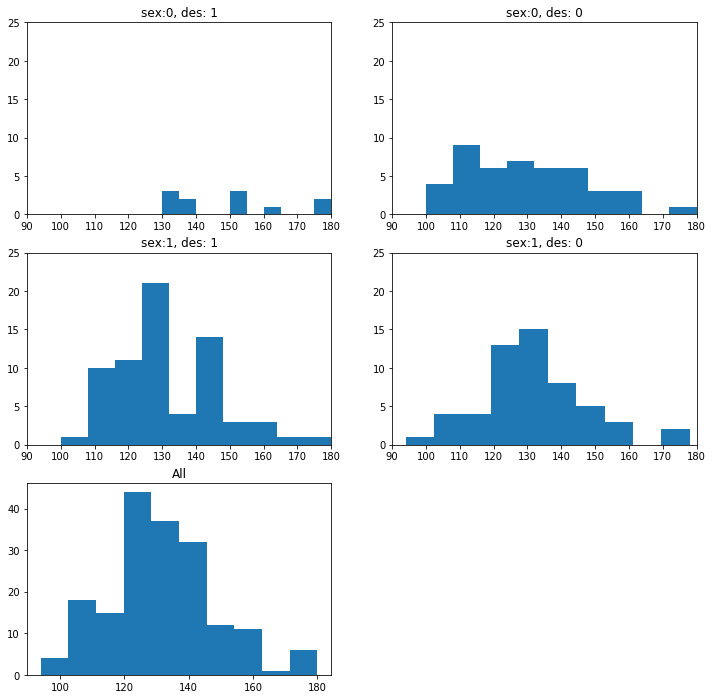

<Figure size 432x288 with 0 Axes>

In [8]:
print('resting_blood_pressure')
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==1)].resting_blood_pressure)
plt.title('sex:0, des: 1')
plt.ylim(0,25)
plt.xlim(90,180)
plt.subplot(3,2,2)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==0)].resting_blood_pressure)
plt.title('sex:0, des: 0')
plt.ylim(0,25)
plt.xlim(90,180)
plt.subplot(3,2,3)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==1)].resting_blood_pressure)
plt.title('sex:1, des: 1')
plt.ylim(0,25)
plt.xlim(90,180)
plt.subplot(3,2,4)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==0)].resting_blood_pressure)
plt.title('sex:1, des: 0')
plt.ylim(0,25)
plt.xlim(90,180)
plt.subplot(3,2,5)
plt.hist(df.resting_blood_pressure)
plt.title('All')
plt.show()
plt.tight_layout()

Sex 0 below 130 is negative
Action: Maybe try to check compared also to slope_of_peak_exercise_st_segment

chest_pain_type


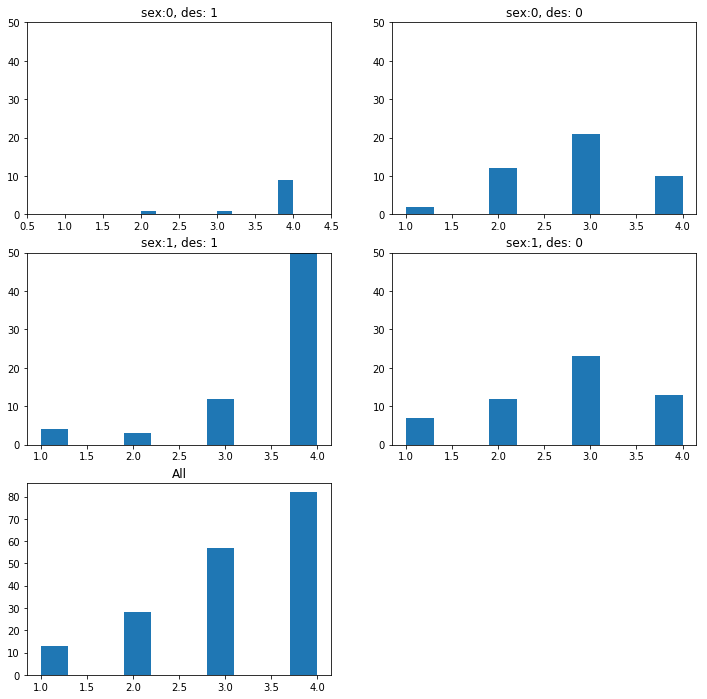

<Figure size 432x288 with 0 Axes>

In [9]:
print('chest_pain_type')
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==1)].chest_pain_type)
plt.title('sex:0, des: 1')
plt.ylim(0,50)
plt.xlim(0.5,4.5)
plt.subplot(3,2,2)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==0)].chest_pain_type)
plt.title('sex:0, des: 0')
plt.ylim(0,50)
plt.subplot(3,2,3)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==1)].chest_pain_type)
plt.title('sex:1, des: 1')
plt.ylim(0,50)
plt.subplot(3,2,4)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==0)].chest_pain_type)
plt.title('sex:1, des: 0')
plt.ylim(0,50)
plt.subplot(3,2,5)
plt.hist(df.chest_pain_type)
plt.title('All')
plt.show()
plt.tight_layout()

Looks like 4 for sex 1 is more with positive, but there are quite cases with 4 negavive

On the other hand most of 2 and 3 are most likely to be negative. For 1 there are not so many data

num_major_vessels


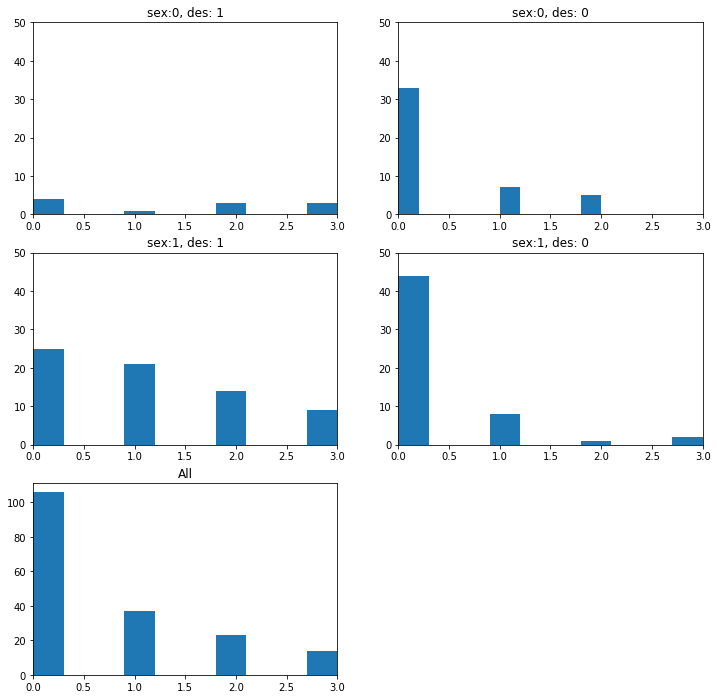

<Figure size 432x288 with 0 Axes>

In [10]:

print('num_major_vessels')
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==1)].num_major_vessels)
plt.title('sex:0, des: 1')
plt.ylim(0,50)
plt.xlim(0,3)
plt.subplot(3,2,2)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==0)].num_major_vessels)
plt.title('sex:0, des: 0')
plt.ylim(0,50)
plt.xlim(0,3)
plt.subplot(3,2,3)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==1)].num_major_vessels)
plt.title('sex:1, des: 1')
plt.ylim(0,50)
plt.xlim(0,3)
plt.subplot(3,2,4)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==0)].num_major_vessels)
plt.title('sex:1, des: 0')
plt.ylim(0,50)
plt.xlim(0,3)
plt.subplot(3,2,5)
plt.hist(df.num_major_vessels)
plt.title('All')
plt.xlim(0,3)
plt.show()
plt.tight_layout()

Looks like as the number is bigger more cases are Positive for both sex

fasting_blood_sugar_gt_120_mg_per_dl


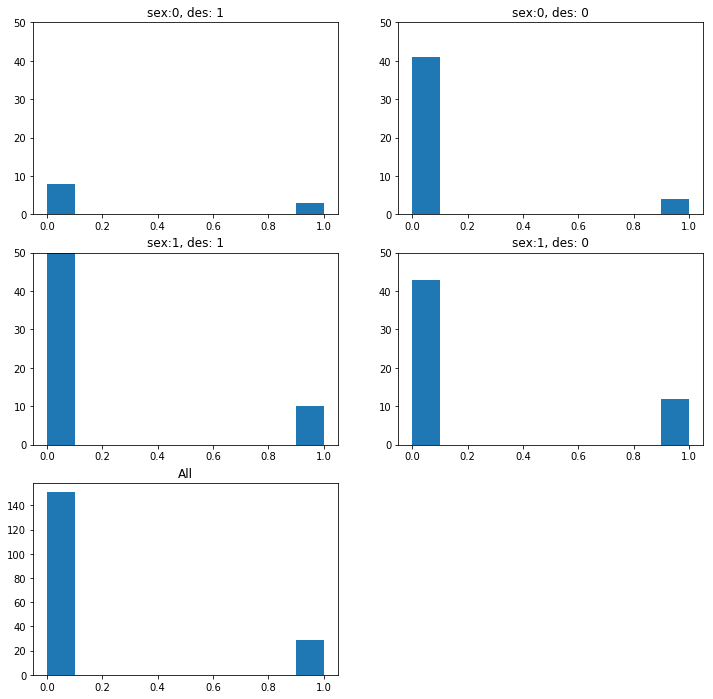

<Figure size 432x288 with 0 Axes>

In [11]:
print('fasting_blood_sugar_gt_120_mg_per_dl')
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==1)].fasting_blood_sugar_gt_120_mg_per_dl)
plt.title('sex:0, des: 1')
plt.ylim(0,50)
plt.subplot(3,2,2)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==0)].fasting_blood_sugar_gt_120_mg_per_dl)
plt.title('sex:0, des: 0')
plt.ylim(0,50)
plt.subplot(3,2,3)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==1)].fasting_blood_sugar_gt_120_mg_per_dl)
plt.title('sex:1, des: 1')
plt.ylim(0,50)
plt.subplot(3,2,4)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==0)].fasting_blood_sugar_gt_120_mg_per_dl)
plt.title('sex:1, des: 0')
plt.ylim(0,50)
plt.subplot(3,2,5)
plt.hist(df.fasting_blood_sugar_gt_120_mg_per_dl)
plt.title('All')
plt.show()
plt.tight_layout()

Nothing from this

Action, maybe to be checked with the odd cases from other features, what kind of value they have

resting_ekg_results


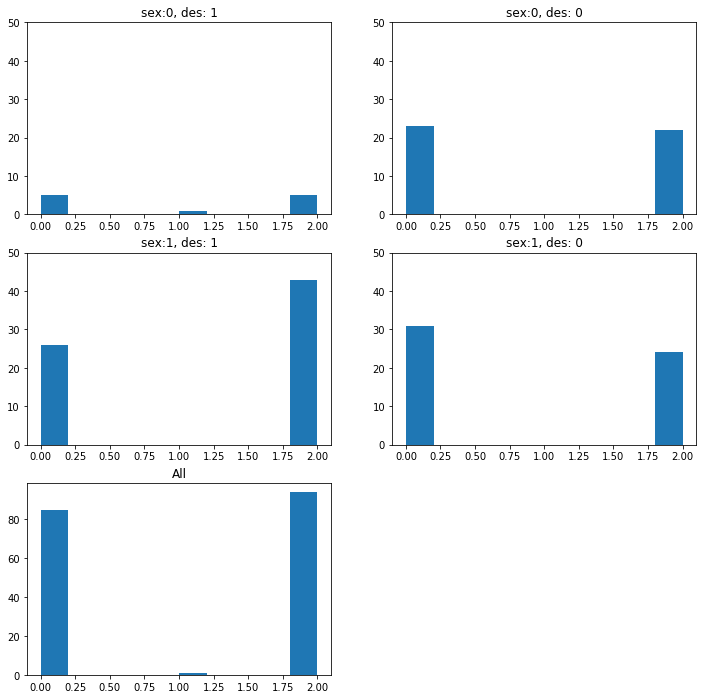

<Figure size 432x288 with 0 Axes>

In [12]:
print('resting_ekg_results')
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==1)].resting_ekg_results)
plt.title('sex:0, des: 1')
plt.ylim(0,50)
plt.subplot(3,2,2)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==0)].resting_ekg_results)
plt.title('sex:0, des: 0')
plt.ylim(0,50)
plt.subplot(3,2,3)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==1)].resting_ekg_results)
plt.title('sex:1, des: 1')
plt.ylim(0,50)
plt.subplot(3,2,4)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==0)].resting_ekg_results)
plt.title('sex:1, des: 0')
plt.ylim(0,50)
plt.subplot(3,2,5)
plt.hist(df.resting_ekg_results)
plt.title('All')
plt.show()
plt.tight_layout()

Nothing from this
Action, maybe to be checked with the odd cases from other features, what kind of value they have

serum_cholesterol_mg_per_dl


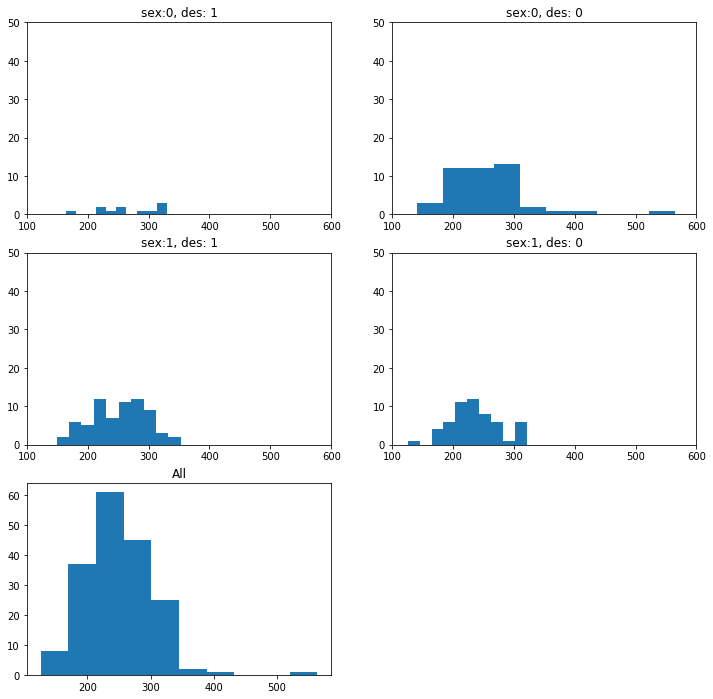

<Figure size 432x288 with 0 Axes>

In [13]:
print('serum_cholesterol_mg_per_dl')
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==1)].serum_cholesterol_mg_per_dl)
plt.title('sex:0, des: 1')
plt.ylim(0,50)
plt.xlim(100,600)
plt.subplot(3,2,2)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==0)].serum_cholesterol_mg_per_dl)
plt.title('sex:0, des: 0')
plt.ylim(0,50)
plt.xlim(100,600)
plt.subplot(3,2,3)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==1)].serum_cholesterol_mg_per_dl)
plt.title('sex:1, des: 1')
plt.ylim(0,50)
plt.xlim(100,600)
plt.subplot(3,2,4)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==0)].serum_cholesterol_mg_per_dl)
plt.title('sex:1, des: 0')
plt.ylim(0,50)
plt.xlim(100,600)
plt.subplot(3,2,5)
plt.hist(df.serum_cholesterol_mg_per_dl)
plt.title('All')
plt.show()
plt.tight_layout()

Nothing from this
Action, maybe to be checked with the odd cases from other features, what kind of value they have

oldpeak_eq_st_depression


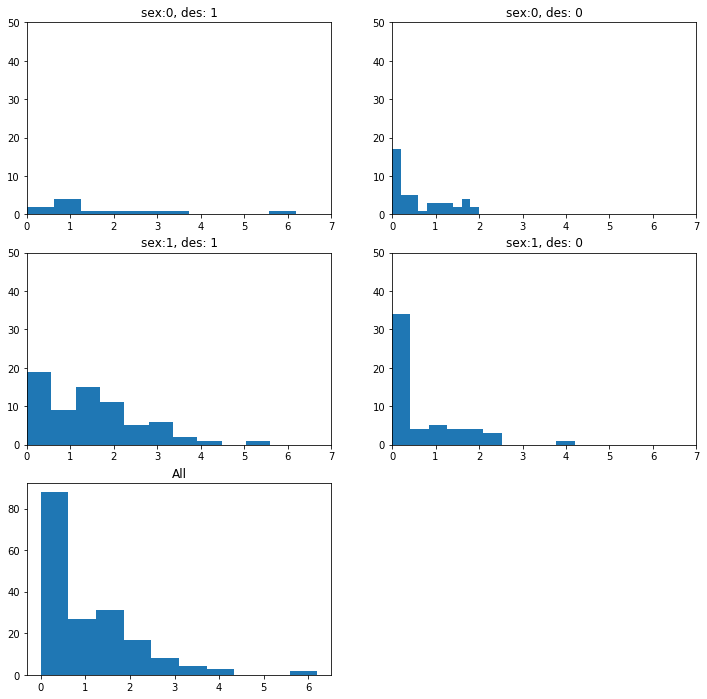

<Figure size 432x288 with 0 Axes>

In [14]:
print('oldpeak_eq_st_depression')
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==1)].oldpeak_eq_st_depression)
plt.title('sex:0, des: 1')
plt.ylim(0,50)
plt.xlim(0,7)
plt.subplot(3,2,2)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==0)].oldpeak_eq_st_depression)
plt.title('sex:0, des: 0')
plt.ylim(0,50)
plt.xlim(0,7)
plt.subplot(3,2,3)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==1)].oldpeak_eq_st_depression)
plt.title('sex:1, des: 1')
plt.ylim(0,50)
plt.xlim(0,7)
plt.subplot(3,2,4)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==0)].oldpeak_eq_st_depression)
plt.title('sex:1, des: 0')
plt.ylim(0,50)
plt.xlim(0,7)
plt.subplot(3,2,5)
plt.hist(df.oldpeak_eq_st_depression)
plt.title('All')
plt.show()
plt.tight_layout()

Mostly around 0 are negative

Action: should be checked the postive around 0 why are positive

Sex 0, all negatives are bellow 2, almost same for sex 1, but with small cases in around 4

age


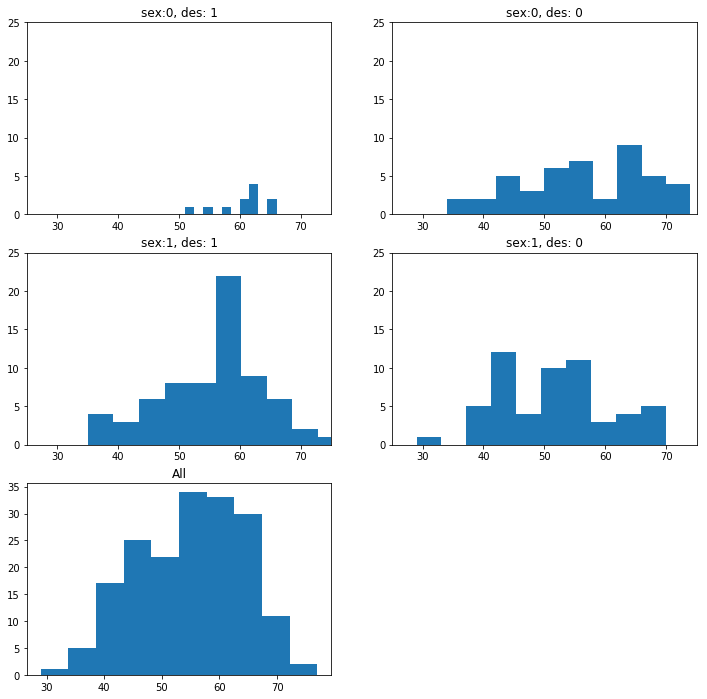

<Figure size 432x288 with 0 Axes>

In [15]:
print('age')
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==1)].age)
plt.title('sex:0, des: 1')
plt.ylim(0,25)
plt.xlim(25,75)
plt.subplot(3,2,2)
plt.hist(df[np.logical_and(df.sex==0, df.heart_disease_present==0)].age)
plt.title('sex:0, des: 0')
plt.ylim(0,25)
plt.xlim(25,75)
plt.subplot(3,2,3)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==1)].age)
plt.title('sex:1, des: 1')
plt.ylim(0,25)
plt.xlim(25,75)
plt.subplot(3,2,4)
plt.hist(df[np.logical_and(df.sex==1, df.heart_disease_present==0)].age)
plt.title('sex:1, des: 0')
plt.ylim(0,25)
plt.xlim(25,75)
plt.subplot(3,2,5)
plt.hist(df.age)
plt.title('All')
plt.show()
plt.tight_layout()

most critical group for sex 1 is around 58

sex 0 has not positives for younger than 52

Check the negatives around 58 to see why they are negative with other features


In [19]:
grouped = df.groupby(['thal','heart_disease_present']).count()['patient_id']


In [20]:
grouped

thal  heart_disease_present
0     0                         4
      1                         4
1     0                        78
      1                        20
2     0                        18
      1                        56
Name: patient_id, dtype: int64

seems like reversible_defect has much more positives, 

Action: needs to be checked what is whit the positives
 
normal are mostly negative

Action: needs to be checked the positive with other features